In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [4]:
ExE = pd.read_csv('../extracted_data/ExE_imputed.csv', sep = ',', index_col = 0)

R2:  -1.283884666174572
RMSE: 0.16885080911772857


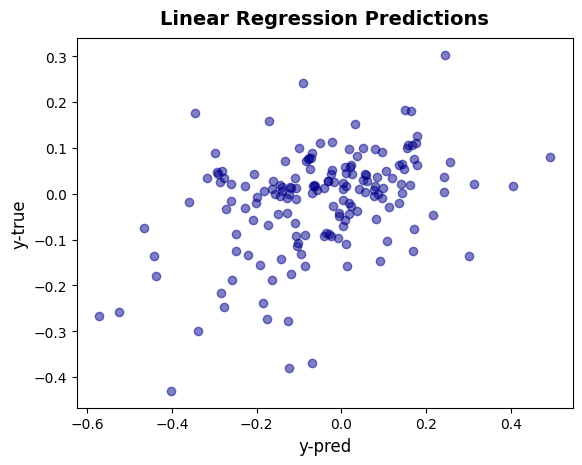

In [5]:
random.seed(36)

target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9187580293298339


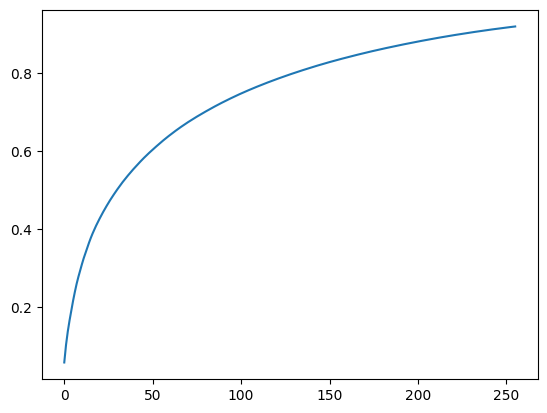

In [6]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [7]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.038610,-0.078878,-0.376961,0.457011,0.081996,0.054366,0.442784,-0.423321,0.181141,-0.102971,...,0.015645,0.008289,-0.011697,-0.061607,-0.050333,-0.020790,0.004858,0.033793,-0.031691,-0.038250
1,-0.194224,-0.116050,-0.506022,0.478343,-0.103492,0.050558,0.552779,-0.513617,0.188051,0.113126,...,0.048211,-0.047296,0.078060,0.034423,-0.001250,-0.057180,0.035354,0.039679,-0.061643,-0.041838
2,-0.965408,-0.426177,0.113698,0.047681,0.064777,-0.167110,-0.023290,-0.116143,0.201261,0.189299,...,0.022651,-0.074577,-0.105318,-0.022232,0.054058,-0.019711,-0.113754,-0.061667,0.021120,0.024497
3,0.209832,-0.710994,-0.415330,0.959675,0.151959,-0.077837,0.496764,-0.133332,0.577068,-0.502252,...,0.063959,0.065704,0.145323,0.008938,-0.055086,0.007731,0.099470,0.020014,0.012842,-0.003066
4,0.156512,0.183419,0.006589,0.236370,-0.234382,-0.259812,0.094851,0.176769,-0.166492,-0.222443,...,-0.032238,0.036458,0.031971,0.030201,-0.118970,-0.023853,-0.002199,-0.020685,0.002391,-0.009283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.023458,0.117061,-0.052614,-0.179213,0.065604,0.216246,-0.000189,0.113773,-0.113299,0.105869,...,0.063985,-0.062479,-0.020913,0.042318,0.079457,-0.045433,0.064120,0.001252,-0.003849,-0.077995
820,-0.053216,0.223363,0.132246,0.366424,-0.063989,0.318440,0.018353,-0.163520,0.070938,-0.105189,...,0.007696,0.050038,0.032404,0.047638,-0.066314,-0.027468,-0.016954,-0.005262,-0.040972,-0.064813
821,-0.106746,0.357858,0.096285,0.290459,0.173414,0.528111,0.149167,-0.175392,0.188206,-0.013606,...,0.071151,0.037628,-0.036647,0.007647,0.050596,-0.016963,-0.021421,0.056323,-0.020948,0.006022
822,0.062898,0.074290,-0.032653,-0.009574,0.173850,0.257481,0.120855,-0.027373,0.038249,-0.072373,...,0.053283,-0.035716,-0.028778,0.070710,0.039848,0.063699,-0.043252,-0.004835,0.006515,-0.038299


R2:  0.2803959641207032
RMSE: 0.09477916034342726


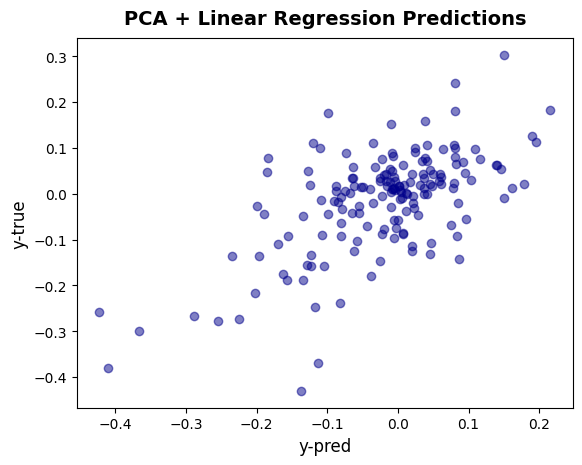

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

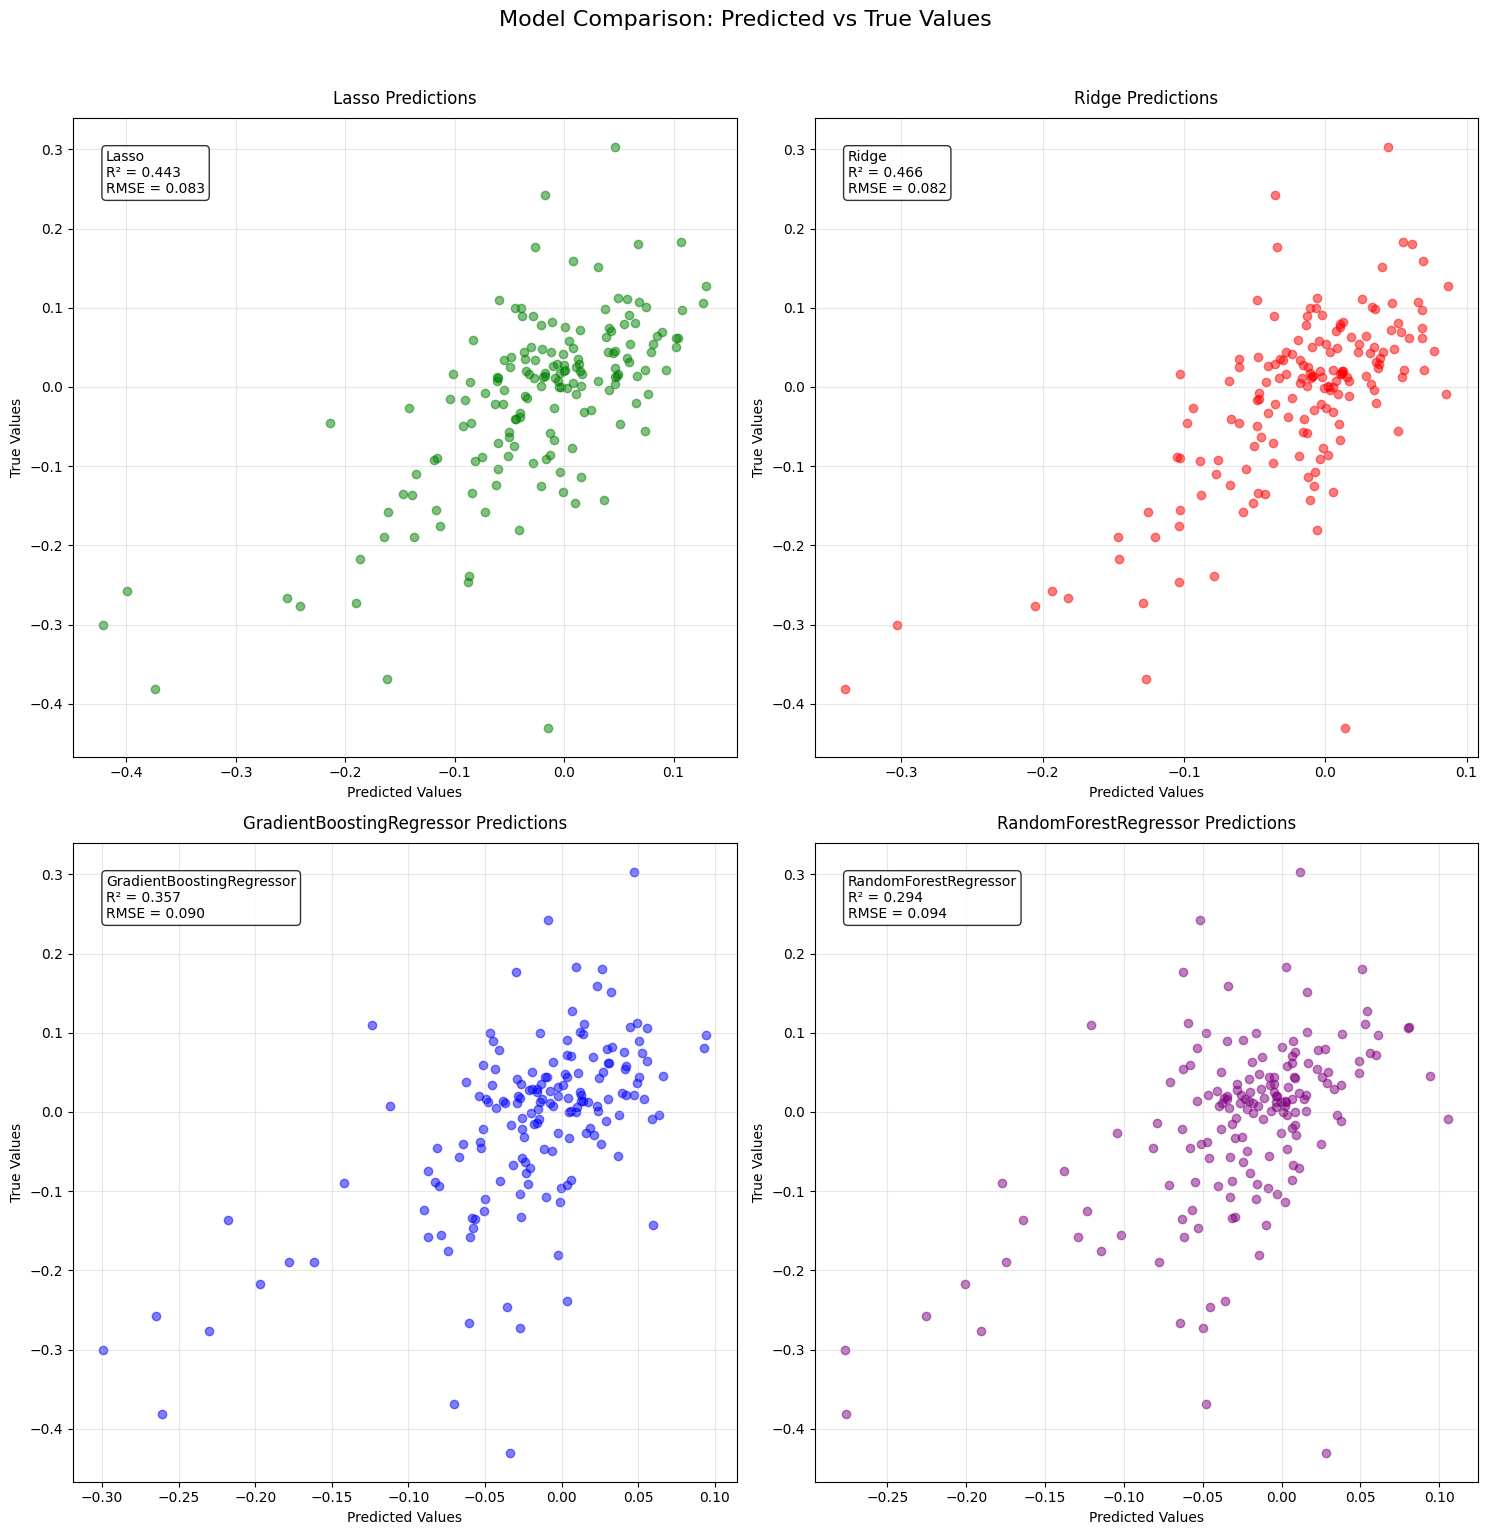

In [9]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4825e-04 - mse: 9.4825e-04 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6576e-04 - mse: 7.6576e-04 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0442e-04 - mse: 3.0442e-04 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2748e-04 - mse: 2.2748e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6751e-04 - mse: 1.6751e-04 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━

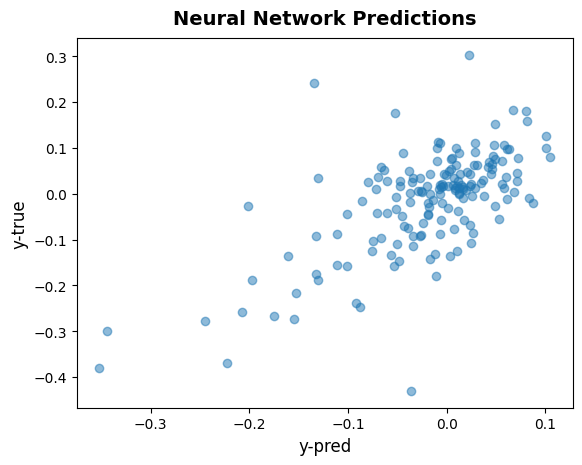

In [10]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()